This notebook computes the correlation between the sines and cosines of the dihedral angles with the two slowest independent componenets (tICs) from the tICA analysis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In next few cells the data of tICA coordinate is loaded

In [3]:
#Load TICA trajectories

l = np.loadtxt('tica-data/tic_traj_0')
l = l.T
tIC_1 = l[0]
tIC_2 = l[1]
for i in range(1,38):
    l = np.loadtxt('tica-data/tic_traj_%d'%i)
    l = l.T
    tIC_1 = np.concatenate((tIC_1,l[0]))
    tIC_2 = np.concatenate((tIC_2,l[1]))

In [4]:
print(tIC_1.shape)
print(tIC_2.shape)

(31516,)
(31516,)


In the next few cells dihedral angles are loaded and correlation is computed

In [6]:
#sin-cosine correlation


f1 = open('tIC_1_sin_corr.dat','w')
f2 = open('tIC_1_cos_corr.dat','w')
f3 = open('tIC_2_sin_corr.dat','w')
f4 = open('tIC_2_cos_corr.dat','w')
print('#index #correlation with tIC 1',file=f1)
print('#index #correlation with tIC 1',file=f2)
print('#index #correlation with tIC 2',file=f3)
print('#index #correlation with tIC 2',file=f4)
for i in range(6873):
    angles = np.loadtxt('dihedral-data/dihedral_%d_traj_0'%i)
    #print(len(angles))
    for j in range(1,38):
        l = np.loadtxt('dihedral-data/dihedral_%d_traj_%d'%(i,j))
        angles = np.concatenate((angles,l))
    #print(len(angles))
    cc_1 = np.corrcoef(tIC_1,np.sin(angles))
    cc_2 = np.corrcoef(tIC_1,np.cos(angles))
    cc_3 = np.corrcoef(tIC_2,np.sin(angles))
    cc_4 = np.corrcoef(tIC_2,np.cos(angles))
    
    
    
    print(i, cc_1[0,1],file=f1)
    print(i, cc_2[0,1],file=f2)
    print(i, cc_3[0,1],file=f3)
    print(i, cc_4[0,1],file=f4)

f1.close()
f2.close()
f3.close()
f4.close()

In [7]:
#sort sin-cosine the TICA correlations

l = np.loadtxt('tIC_1_sin_corr.dat')

sorted1 = l[np.argsort(l[:, 1])]

f1 = open('sorted_tIC_1_sin_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted1)):
    print(int(sorted1[i,0]),sorted1[i,1],file=f1)
f1.close()

l = np.loadtxt('tIC_1_cos_corr.dat')

sorted1 = l[np.argsort(l[:, 1])]

f1 = open('sorted_tIC_1_cos_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted1)):
    print(int(sorted1[i,0]),sorted1[i,1],file=f1)
f1.close()

l = np.loadtxt('tIC_2_sin_corr.dat')

sorted2 = l[np.argsort(l[:, 1])]

f1 = open('sorted_tIC_2_sin_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted2)):
    print(int(sorted2[i,0]),sorted2[i,1],file=f1)
f1.close()

l = np.loadtxt('tIC_2_cos_corr.dat')

sorted2 = l[np.argsort(l[:, 1])]

f1 = open('sorted_tIC_2_cos_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted2)):
    print(int(sorted2[i,0]),sorted2[i,1],file=f1)
f1.close()

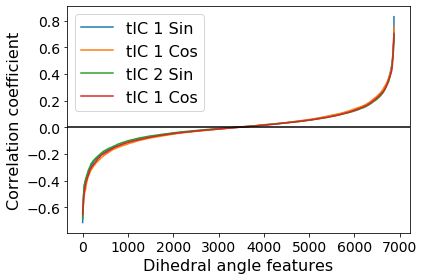

In [14]:
#spectra sin-cos
l1 = np.loadtxt('tIC_1_sin_corr.dat')

l1.sort(axis=0)

l1 = l1.T

l2 = np.loadtxt('tIC_1_cos_corr.dat')

l2.sort(axis=0)

l2 = l2.T

l3 = np.loadtxt('tIC_2_sin_corr.dat')

l3.sort(axis=0)

l3 = l3.T

l4 = np.loadtxt('tIC_2_cos_corr.dat')

l4.sort(axis=0)

l4 = l4.T



plt.plot(l1[0],l1[1],label='tIC 1 Sin')
plt.plot(l2[0],l2[1],label='tIC 1 Cos')
plt.plot(l3[0],l3[1],label='tIC 2 Sin')
plt.plot(l4[0],l4[1],label='tIC 1 Cos')
plt.xlabel('Dihedral angle features',fontsize=16)
plt.ylabel('Correlation coefficient',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(y=0,color='k')
plt.legend(fontsize=16)
plt.tight_layout()

#plt.show()
plt.savefig('spectra.pdf')